In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 

In [2]:
start_date='2017-03-01'
end_date='2017-04-01'
dates=pd.date_range(start_date, end_date)
df1 = pd.DataFrame(index=dates)
for symb in ['AAPL', 'HCP']:
    df_temp = pd.read_csv("../data/%s.csv" % symb, index_col="Date", parse_dates=True, \
                    usecols=["Date", "Adj Close"], na_values=['nan'])
    df_temp = df_temp.rename(columns={"Adj Close": symb})
#     print df_temp.head()
    df1 = df1.join(df_temp, lsuffix="1", rsuffix="2")
df1 = df1.dropna(how="any")

In [4]:
print df1.mean()
print df1.median()
print df1.std()

AAPL    140.617826
HCP      30.679131
dtype: float64
AAPL    139.990005
HCP      30.570000
dtype: float64
AAPL    1.723495
HCP     0.805453
dtype: float64


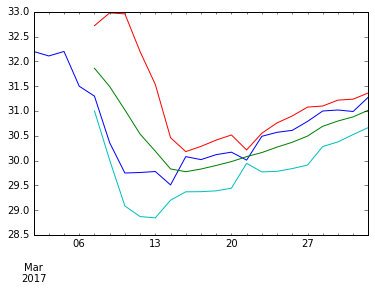

In [18]:
# bollinger bands - 2sd +- from rolling mean
# buy when the stock hits +- 2sd mark, signals that it'll bounce back, so sell / buy signal

ax = df1['HCP'].plot()
rm = pd.rolling_mean(df1['HCP'], window=5)
rm.plot(ax=ax)

rstd = pd.rolling_std(df1['HCP'], window=5)
(rm + 2 * rstd).plot(ax=ax)
(rm - 2 * rstd).plot(ax=ax)

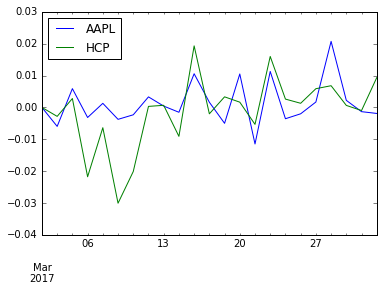

In [21]:
# daily returns
daily_returns = df1.copy()
daily_returns[1:] = (df1[1:] / df1[:-1].values) - 1 
daily_returns.ix[0,:] = 0
daily_returns.plot()

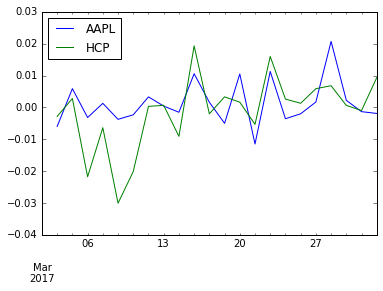

In [23]:
(df1 / df1.shift(1) - 1).plot()